#google colab link
https://colab.research.google.com/drive/1zpjI_nOYlEORb_IJfr-dPwHiNQCFQr2Q

## **1. Load the data into data frame**

In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


##2. Data Preparation and data exploration 

In [3]:
df.shape 

(284807, 31)

This data set consists 284,807 rows and 31 columns. 

In [4]:
#check if dataframe has any missing value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Above shows that there is no missing value at this dataset.

In [5]:
#look at data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Most of the columns are float type, and only Class column is int type. This class column is the target value, 1 means fraud and 0 means non-fraud.

In [0]:
#show statistic value of each column
#df.describe()

In [7]:
#look at only fraud data
df_1 = df.loc[df['Class']==1] 
df_1.shape

(492, 31)

In [8]:
df_0 = df.loc[df['Class']==0]
df_0.shape

(284315, 31)

Above shows that fraud data has 492 rows which is 0.173% of the dataset, and non-fraud data has 176, 033 rows which is 99.827% of the dataset. This is an unbalanced dataset.

##3. Data Visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Class Distributions \n (0 = non-fraud and 1 = fraud)')

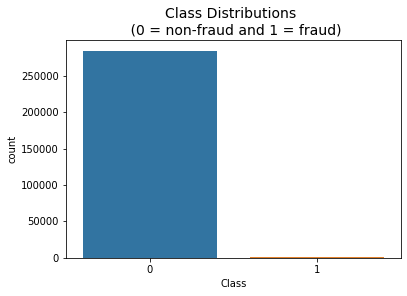

In [9]:
#visulize the unbalanced data
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0 = non-fraud and 1 = fraud)', fontsize=14)

The bar chart above visulizes this unbalanced dataset. It shows that there are much more non-fraud data than fraud data.

##4. Data Preprocessing

The following is shows how to scale the data, column time and amount are not scaled yet before fit them into model.

In [10]:
#This apply scaler to column amount and time
from sklearn.preprocessing import StandardScaler, RobustScaler
amount = df['Amount'].values.reshape(-1, 1)
transformer = RobustScaler().fit(amount)
df['scale_amount'] = transformer.transform(amount)
df['scale_amount'].head()

0    1.783274
1   -0.269825
2    4.983721
3    1.418291
4    0.670579
Name: scale_amount, dtype: float64

In [11]:
#transfer data into 2D array repeat steps above
time = df['Time'].values.reshape(-1, 1)
transformer2 = RobustScaler().fit(time)
df['scale_time'] = transformer2.transform(time)
df['scale_time'].head()

0   -0.994983
1   -0.994983
2   -0.994972
3   -0.994972
4   -0.994960
Name: scale_time, dtype: float64

In [0]:
#drop the column without scale
df.drop(['Time','Amount'], axis=1, inplace=True)

This method is to remove some data and match a 50/50 ratio on the new dataset.

In [13]:
df_random = df.sample(frac=1) #return random sample items
# amount of fraud classes 492 rows
fraud_df = df_random.loc[df_random['Class']==1] #dataset for fraud
non_fraud_df = df_random.loc[df_random['Class']==0][:492] #dataset for non_fraud

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Shuffle dataframerows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount,scale_time
114777,-0.483757,0.899320,1.670685,0.074251,-0.305907,-1.135818,0.620007,-0.018663,-0.239161,-0.279292,-0.306939,-0.561328,-1.192514,0.397402,0.954788,0.158102,-0.207099,-0.311453,-0.102646,0.039419,-0.211797,-0.633826,0.057961,0.659414,-0.272259,0.054692,0.253927,0.123316,0,-0.175784,-0.130100
195383,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,0.085662,-0.000121,-0.054381,0.736192,-2.306645,-0.464003,1.672723,1.165737,0.561323,-2.300798,1.277315,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,1,9.798225,0.544320
62528,0.426495,1.870505,-2.145193,1.609318,0.672354,-1.610423,0.479028,0.307463,-0.729606,-1.235503,2.216955,0.039857,-0.515527,-2.953245,0.376900,1.170784,2.759493,2.085322,-0.124898,-0.021945,-0.057010,-0.089720,0.129000,-0.026558,-0.476379,-0.414937,0.126098,-0.058007,0,-0.272480,-0.403999
17317,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,4.303096,-6.008660,1.138969,-5.580447,-0.110737,-5.491073,-11.588544,-4.715420,0.734573,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1,1.089779,-0.658690
79874,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,0.614977,-0.657948,-0.948412,-1.635145,1.263203,0.068533,1.325794,0.376383,-1.096196,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1,-0.236289,-0.311035


#Visulize the balanced dataset

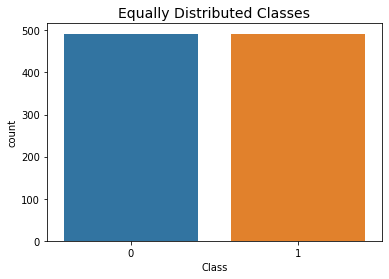

In [14]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

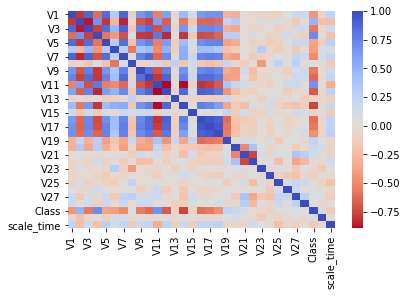

In [15]:
#use subsample to plot correlation
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

#5. Prepare the sample and split them into train and test set

In [0]:
#Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [18]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#apply cross validation
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(clf, X_train, y_train, cv=10)
training_score


array([0.93670886, 0.91139241, 0.89873418, 0.96202532, 0.92405063,
       0.93670886, 0.94936709, 0.96153846, 0.97435897, 0.93589744])

In [20]:
training_score.mean()

0.9390782213567024